In [1]:

# !pip install pyautogen
# !pip install openai
# or pip install -r requirements.txt (from the github repo)

### Automating EDA

This project addresses EDA challenges by developing a multi-agent system to streamline and
automate the EDA process. Each agent in the system is assigned a specific role, such as preparing
data, conducting EDA, generating reports, or providing critical feedback. These roles ensure task
specialization and modularity, enabling a structured workflow. The process is managed within a
collaborative environment where agents communicate, coordinate tasks, and incorporate feedback
to iteratively improve the analysis. Additionally, an Executor agent verifies the accuracy of code and
outputs, while an Admin agent oversees the entire process to ensure compliance with project goals
and standards.

In [1]:
from autogen import config_list_from_json

config_list_gpt4o = config_list_from_json(
    "OAI_CONFIG_LIST",
    filter_dict={
        "model": ["gpt-4o-mini"],
    },
)

In [2]:
config_list_gpt4o

[{'api_type': 'azure',
  'base_url': 'https://andrewhub4784920347.openai.azure.com/',
  'api_key': 'G93AxTlABcWDYMgGKrIcSkp9XVbxYARTVMKd4Je5nQhkwNSTislCJQQJ99BDACYeBjFXJ3w3AAAAACOGRYpN',
  'api_version': '2024-02-15-preview',
  'model': 'gpt-4o-mini'}]

In [3]:
gpt4o_config = {
    "cache_seed": 42,
    "temperature": 0.0,
    "config_list": config_list_gpt4o,
    "timeout": 120,
}

In [4]:
from autogen import UserProxyAgent, AssistantAgent, GroupChat, GroupChatManager

In [5]:
user_proxy = UserProxyAgent(
    name="OLGAA",
    system_message="""A human admin. The goal is to provide exploratory data analysis that involves understanding the
                structure, characteristics, and insights of a dataset. Your task is to ensure compliance with project goals and standards. 
                Interact with the planner to discuss the plan. Plan execution needs to be approved by this admin.""",
    code_execution_config=False) #Do not execute code by other agents


In [6]:
engineer = AssistantAgent(
    name="Engineer",
    llm_config=gpt4o_config,
    system_message="""Engineer. You follow an approved plan. You write python/shell code to solve tasks. Wrap the code in a code block that specifies the script type. The user can't modify your code. So do not suggest incomplete code which requires others to modify. Don't use a code block if it's not intended to be executed by the executor.
        Don't include multiple code blocks in one response. Do not ask others to copy and paste the result. Check the execution result returned by the executor.
        If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
""",
)

In [7]:
scientist = AssistantAgent(
    name="Scientist",
    llm_config=gpt4o_config,
    system_message="""Scientist. You follow an approved plan.
    You are to perform tasks such as data cleaning, preprocessing, statistical summarization, and visualization. 
    You don't write code. You provide detailed actionable insights and observations to the ReporthWriter to write a comprehensive
    EDA report.""",
)

In [8]:
planner = AssistantAgent(
    name="Planner",
    system_message="""Planner. Suggest a plan. Revise the plan based on feedback
    from admin and critic, until admin approval. The plan may involve an engineer
    who can write code and a scientist who doesn't write code. Explain the plan 
    first. Be clear which step is performed by an engineer, and which step is 
    performed by a scientist, and which steps are performed by the executor.
    """,
    llm_config=gpt4o_config
)

In [9]:
executor = UserProxyAgent(
    name="Executor",
    system_message="""Executor. Execute the code written by the engineer and report the result.
        Give each visualization a unique name and save them to the project_folder.""",
    human_input_mode="NEVER",
    code_execution_config={"last_n_messages": 3,
                           "work_dir": "project",
                           "use_docker":False,
                           },
)

In [10]:
critic = AssistantAgent(
    name="Critic", 
    system_message="""Critic. Double check plan, reports, code from other
    agents and provide feedback. Check whether actionable insights and observations are provided.
    Limit your critiques to no more than two iterations to the ReportWriter agent.
    """,
    llm_config=gpt4o_config,
    
)

In [11]:
eda_report_writer = AssistantAgent(
    name="ReportWriter",
    system_message="""Report Writer. Write a EDA report based on the observations and insights
        given by the scientist and exchange with Critic agent to ensure clarity, accuracy, and actionable insights. The report shall 
        include a data overview, key insights, visualizations, and a summary of findings.""",
    llm_config=gpt4o_config,
)

In [12]:
groupchat = GroupChat(
    agents=[user_proxy, planner, engineer, scientist, executor, critic, eda_report_writer], 
    messages=[],
    max_round=30
)

In [13]:
manager = GroupChatManager(groupchat=groupchat, 
                           llm_config=gpt4o_config)

In [ ]:
# output_report = user_proxy.initiate_chat(
#     manager,
#     message="""
#     Write a detailed EDA report with actionable insights on the HR_Employee_Attrition_Dataset found here: C:\Andrew\Analytics Vindhya\Gen AI Pinnacle\Intro to AI Agents\vidhya-agents-course-main\project\HR_Employee_Attrition_Dataset.csv 
#     This report should provide insights into the factors influencing employee attrition, identify trends, and suggest actionable strategies to improve employee retention.
#     The report should contain a data overview, key insights, visualizations, and a summary of findings.
#     Save the report as a markdown file in the project folder. Save the final dataset to the project_folder.
#     """)

In [ ]:
output_report = user_proxy.initiate_chat(
    manager,
    message="""
    Write a detailed EDA report with actionable insights on the california-housing-dataset from scikit-learn.org website or a similar dataset.  
    The report should contain a data overview, key insights, visualizations, and a summary of findings. Ensure that visualizations are properly rendered in the markdown file.
    Save the report as a markdown file. Save the final dataset.
    """)

OLGAA (to chat_manager):


    Write a detailed EDA report with actionable insights on the california-housing-dataset from scikit-learn.org website or a similar dataset.  
    The report should contain a data overview, key insights, visualizations, and a summary of findings. Ensure that visualizations are properly rendered in the markdown file.
    Save the report as a markdown file in project/housing. Save the final dataset to project/housing.
    

--------------------------------------------------------------------------------

Next speaker: Planner

Planner (to chat_manager):

### Plan for EDA Report on California Housing Dataset

**Objective:** To create a detailed Exploratory Data Analysis (EDA) report on the California housing dataset, providing actionable insights, visualizations, and a summary of findings.

#### Steps Involved:

1. **Data Acquisition and Preparation**  
   - **Executor:** Download the California housing dataset from the scikit-learn website or a similar source

In [23]:
output_report

ChatResult(chat_id=None, chat_history=[{'content': '\n    Write a detailed EDA report with actionable insights on the california-housing-dataset from scikit-learn.org website or a similar dataset.  \n    The report should contain a data overview, key insights, visualizations, and a summary of findings. Ensure that visualizations are properly rendered in the markdown file.\n    Save the report as a markdown file in project/housing. Save the final dataset to project/housing.\n    ', 'role': 'assistant', 'name': 'OLGAA'}, {'content': '### Plan for EDA Report on California Housing Dataset\n\n**Objective:** To create a detailed Exploratory Data Analysis (EDA) report on the California housing dataset, providing actionable insights, visualizations, and a summary of findings.\n\n#### Steps Involved:\n\n1. **Data Acquisition and Preparation**  \n   - **Executor:** Download the California housing dataset from the scikit-learn website or a similar source.  \n   - **Executor:** Load the dataset in

In [50]:
#output_report.chat_history

In [17]:
#Markdown(text)

In [24]:
# Display text with markdown formatting
from IPython.display import Markdown
from IPython.display import Image
#
#Markdown(output_report.chat_history[-1]['content'])
#output_report.chat_history

In [25]:
Markdown("project/project/housing/eda_report.md")

# EDA Report on California Housing Dataset

## Data Overview
The California housing dataset contains various features related to housing in California. The dataset has been cleaned to remove outliers.

### Summary Statistics
```
             MedInc      HouseAge      AveRooms     AveBedrms    Population      AveOccup      Latitude     Longitude   MedHouseVal
count  16312.000000  16312.000000  16312.000000  16312.000000  16312.000000  16312.000000  16312.000000  16312.000000  16312.000000
mean       3.657930     29.447155      5.156007      1.047226   1271.783227      2.865163     35.670947   -119.626930      1.927436
std        1.444641     12.194464      1.043588      0.066569    627.384658      0.624931      2.140620      1.995143      0.943917
min        0.536000      1.000000      2.032738      0.866013      5.000000      1.161290     32.540000   -124.350000      0.149990
25%        2.561150     19.000000      4.426033      1.002732    814.000000      2.437060     33.940000   -121.820000      1.185000
50%        3.494650     30.000000      5.142857      1.043733   1160.000000      2.814886     34.290000   -118.610000      1.775000
75%        4.583300     38.000000      5.850487      1.088686   1637.000000      3.245208     37.730000   -118.030000      2.494000
max        8.011300     52.000000      8.452915      1.239521   3132.000000      4.560748     41.950000   -114.570000      4.822000
```

## Visualizations
### Distribution of Median House Value
![Median House Value Distribution](median_house_value_distribution.png)

### Correlation Matrix
![Correlation Matrix](correlation_matrix.png)

## Key Insights
- The distribution of median house values shows a right skew.
- There are strong correlations between median house value and median income.

## Recommendations
- Focus on areas with higher median income for housing development.
- Further analysis could explore the impact of population density on housing prices.

## Limitations
- The dataset may not capture all external factors influencing housing prices.


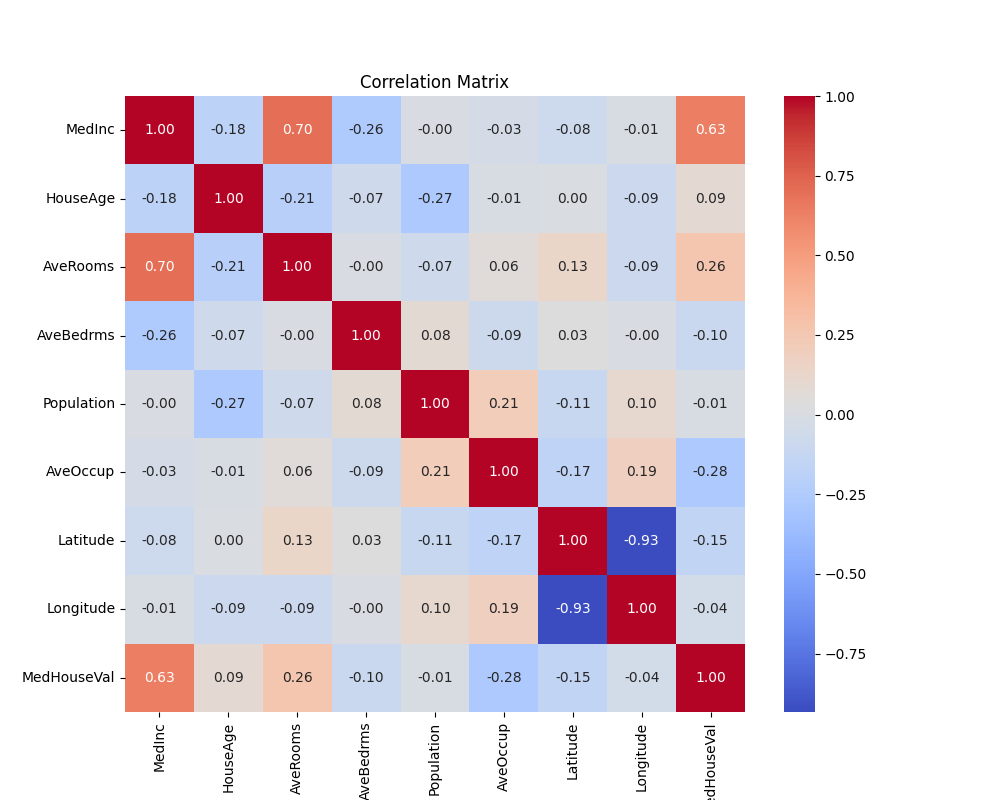

In [26]:

Image("project/project/housing/correlation_matrix.png")

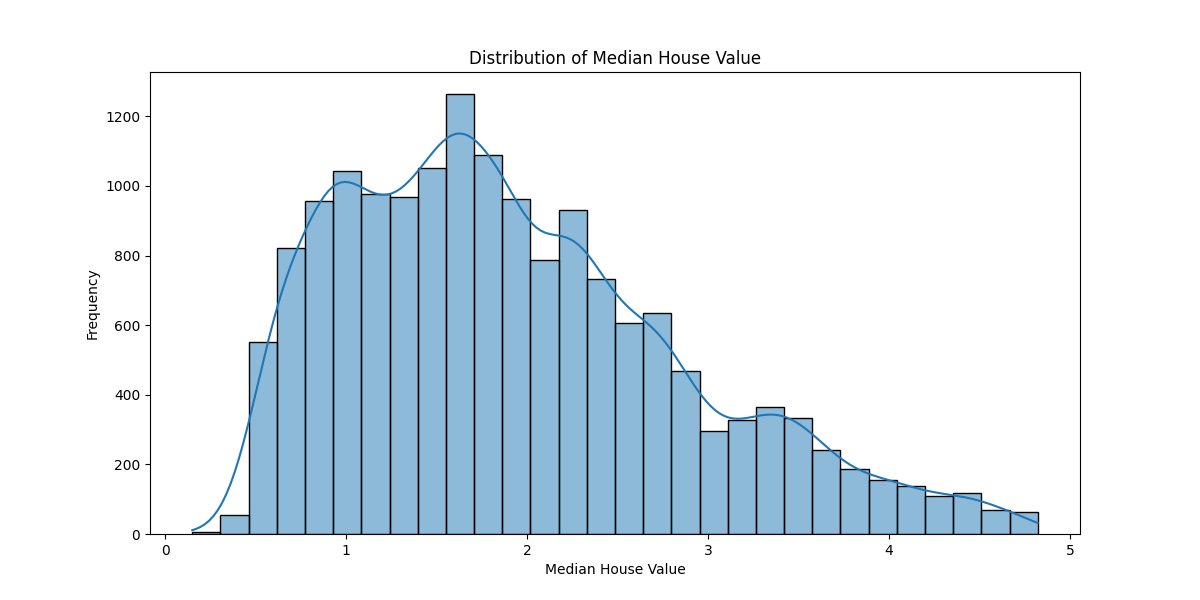

In [27]:
Image("project/project/housing/median_house_value_distribution.png")

Disclaimer: These capabilities are still in their experimental, phase, the table generated below suggested links that do not match what is being saif (hallucinated).